In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ot 

import sys
sys.path.append("../src")
from utility import PRHCP


In [3]:
d = 50
n = 200
R = 50

m = np.zeros(d)
v = np.eye(d)
X = np.random.multivariate_normal(m,v,n)
ss = np.arange(-2,2.2,0.4)
L = len(ss)

mw = np.zeros((L,R))
msw = np.zeros((L,R))
mprhcp = np.zeros((L,R))

a = np.ones(n)/n
b = np.ones(n)/n

for r in range(R):

    np.random.seed(2022*r)
    for i in range(L):
        Y = np.random.multivariate_normal(m,v,n)
        Y[:,0:2] = Y[:,0:2]+ss[i]

        # SW
        msw[i,r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        # EMD
        M = ot.dist(X,Y)
        mw[i,r] = np.sqrt(ot.emd2(a,b,M))

        # PRHPD
        mprhcp[i,r] = PRHCP(X,Y)[1]


In [4]:
d = 50
n = 200
R = 50

m = np.zeros(d)
v = np.eye(d)
X = np.random.multivariate_normal(m,v,n)
X[:,0:2] = X[:,0:2]*3

ss = np.arange(1,5.2,0.4)
L = len(ss)

vw = np.zeros((L,R))
vsw = np.zeros((L,R))
vprhcp = np.zeros((L,R))

a = np.ones(n)/n
b = np.ones(n)/n

for r in range(R):

    np.random.seed(2022*r)
    for i in range(L):
        Y = np.random.multivariate_normal(m,v,n)
        Y[:,0:2] = Y[:,0:2]*ss[i]

        # SW
        vsw[i,r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022) 

        # EMD
        M = ot.dist(X,Y)
        vw[i,r] = np.sqrt(ot.emd2(a,b,M))

        # PRHPD
        vprhcp[i,r] = PRHCP(X,Y)[1]

In [5]:
d = 50
n = 200
R = 50

m = np.zeros(d)
v = np.eye(d)
X = np.random.multivariate_normal(m,v,n)
X[:,0:2] = X[:,0:2]*3
vc = np.eye(2)
mc = np.zeros(2)

ss = np.arange(-1,1.2,0.2)
L = len(ss)

w = np.zeros((L,R))
sw = np.zeros((L,R))
prhcp = np.zeros((L,R))

a = np.ones(n)/n
b = np.ones(n)/n

for r in range(R):

    np.random.seed(2022+42*r)
    for i in range(L):
        Y = np.random.multivariate_normal(m,v,n)
        vc[0,1] = vc[1,0] = ss[i]
        Y[:,0:2] = np.random.multivariate_normal(mc,vc,n)*3
        
        # SW
        sw[i,r] = ot.sliced.sliced_wasserstein_distance(X, Y, seed=2022, n_projections=200) 

        # EMD
        M = ot.dist(X,Y)
        w[i,r] = np.sqrt(ot.emd2(a,b,M))

        # PRHPD
        prhcp[i,r] = PRHCP(X,Y)[1]

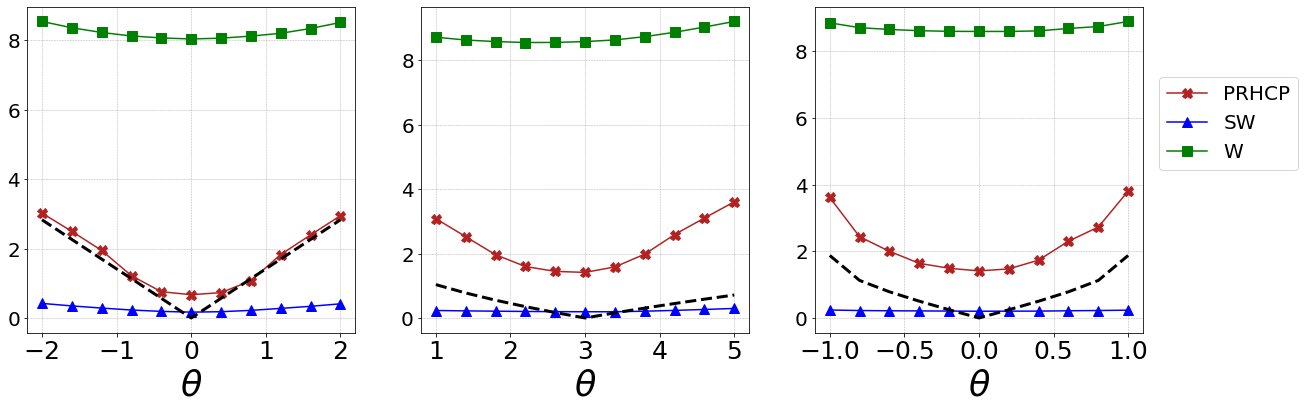

In [9]:
plt.figure(figsize=(20,6))
ss = 2
plot_lines = []

plt.subplot(1,3,1)
ss = np.arange(-2,2.2,0.4)
plt.plot(ss,(np.mean(mprhcp,1)),c='firebrick',label='PRHCP',marker='X',markersize=10)
plt.plot(ss,(np.mean(msw,1)),c='b',label='SW',marker='^',markersize=10)
plt.plot(ss,(np.mean(mw,1)),c='g',label='W',marker='s',markersize=10)
plt.plot(ss,np.sqrt(2)*np.abs(ss),c='k',linestyle='--',linewidth=3)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks([-2,-1,0,1,2],fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel(r'$\theta$',fontsize=35)


plt.subplot(1,3,2)
ss = np.arange(1,5.2,0.4)
plt.plot(ss,(np.mean(vprhcp,1)),c='firebrick',label='PRHCP',marker='X',markersize=10)
plt.plot(ss,(np.mean(vsw,1)),c='b',label='SW',marker='^',markersize=10)
plt.plot(ss,(np.mean(vw,1)),c='g',label='W',marker='s',markersize=10)
plt.plot(ss,np.abs(np.sqrt(3)-np.sqrt(ss))*np.sqrt(2),c='k',linestyle='--',linewidth=3)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks([1,2,3,4,5],fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel(r'$\theta$',fontsize=35)


plt.subplot(1,3,3)
ss = np.arange(-1,1.2,0.2)
l1, = plt.plot(ss,(np.mean(prhcp,1)),c='firebrick',label='PRHCP',marker='X',markersize=10)
l2, = plt.plot(ss,(np.mean(sw,1)),c='b',label='SW',marker='^',markersize=10)
l3, = plt.plot(ss,(np.mean(w,1)),c='g',label='W',marker='s',markersize=10)
l4, = plt.plot(ss,np.sqrt(6)*np.sqrt(2-np.sqrt(1+ss)-np.sqrt(1-ss)),c='k',linestyle='--',linewidth=3)

plot_lines.append(l1)
plot_lines.append(l2)
plot_lines.append(l3)
plot_lines.append(l4)


plt.xlabel(r'$\theta$',fontsize=35)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=25)
plt.yticks(fontsize=20)
plt.legend(loc=3, bbox_to_anchor=(1.05,0.5),borderaxespad = 0., fontsize=20)
